### PART B
#### DOMAIN: Autonomous Vehicles
####  CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

#### DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

#### Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/ Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site.

#### PROJECT OBJECTIVE:
- To build a digit classifier on the SVHN (Street View Housing Number) dataset.

#### 1. Data Import and Exploration.
- Q1A: Read the .h5 file and assign to a variable

In [2]:
!pip install keras==2.15.0
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [5]:
!pip install h5py
import h5py

In [6]:
#Open the file as readonly
data=h5py.File('/content/drive/MyDrive/AIML_Program/Neaural Networks/Project/Autonomous_Vehicles_SVHN_single_grey1.h5')

#### Q1B: Print all the keys from the .h5 file

In [7]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

#### Q1C: Split the data into X_train, X_test, Y_train, Y_test

In [8]:
#Load the training, testing, and validation data
X_train=data['X_train'][:]
X_test=data['X_test'][:]
y_train=data['y_train'][:]
y_test=data['y_test'][:]
X_val=data['X_val'][:]
y_val=data['y_val'][:]

#### 2: . Data Visualisation and preprocessin.
- Q2A: Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [9]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


Training, Test and Validation datasets are in sync as can be seen from above shape info where Train/Test combined have 60000 records and Validation dataset matches to these records.

#### 2B:  Visualise first 10 images in train data and print its corresponding label.

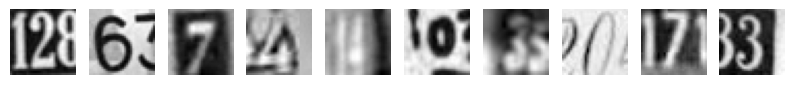

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# visualizing the first 10 images in the train dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

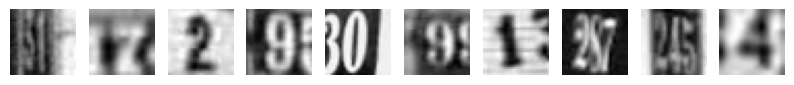

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [11]:
# visualizing the first 10 images in the test dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

#### Q2C: . Reshape all the images with appropriate shape update the data in same variable.

In [12]:
#Importing Libraries
import tensorflow
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math

In [13]:
# RESHAPE 2D - 32*32 into 1D - 1024
X_train = X_train.reshape(X_train.shape[0], 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


#### Q2D: Normalise the images (Normalise the pixel values).

In [14]:
import math
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}\n')
maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


#### Q2E: Transform Labels into format acceptable by Neural Network.

In [15]:
#One hot encode the labels for Train,Test, Val data.
print(f'Train value before one hot encode {y_train[0]}\n')
print(f'Test value before one hot encode {y_test[0]}\n')
print(f'Validation set value before one hot encode {y_val[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tensorflow.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Train value after one hot encode {y_train[0]}\n')
print(f'Test value after one hot encode {y_test[0]}\n')
print(f'Validation set after one hot encode {y_val[0]}\n')

Train value before one hot encode 2

Test value before one hot encode 1

Validation set value before one hot encode 0

Train value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

Test value after one hot encode [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Validation set after one hot encode [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



#### 2QF: Print total Number of classes in the Dataset.

In [19]:
print("Training set", y_train.shape)
print("Test set", y_test.shape)
print("Training set", y_val.shape)

Training set (42000, 10)
Test set (18000, 10)
Training set (60000, 10)


y train Label for image at index 1 is 2
y train Label for image at index 2 is 6
y train Label for image at index 3 is 7
y train Label for image at index 4 is 4
y train Label for image at index 5 is 4
y train Label for image at index 6 is 0
y train Label for image at index 7 is 3
y train Label for image at index 8 is 0
y train Label for image at index 9 is 7
y train Label for image at index 10 is 3


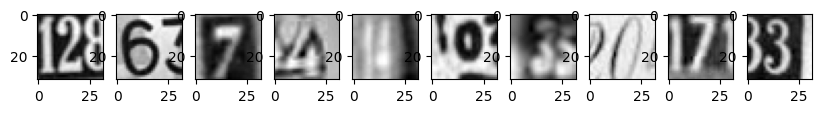

In [15]:
#cross check number of classes in a datset.
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'y train Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

y test Label for image at index 1 is 1
y test Label for image at index 2 is 7
y test Label for image at index 3 is 2
y test Label for image at index 4 is 9
y test Label for image at index 5 is 0
y test Label for image at index 6 is 9
y test Label for image at index 7 is 1
y test Label for image at index 8 is 8
y test Label for image at index 9 is 4
y test Label for image at index 10 is 4


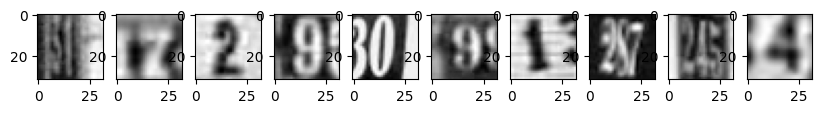

In [16]:
#cross check number of classes in a datset.
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    print(f'y test Label for image at index {i+1} is {np.argmax(y_test[0:10][i])}')

y val Label for image at index 1 is 0
y val Label for image at index 2 is 0
y val Label for image at index 3 is 0
y val Label for image at index 4 is 0
y val Label for image at index 5 is 0
y val Label for image at index 6 is 0
y val Label for image at index 7 is 0
y val Label for image at index 8 is 0
y val Label for image at index 9 is 0
y val Label for image at index 10 is 0


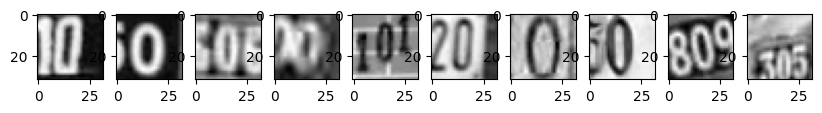

In [17]:
#cross check number of classes in a datset.
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_val[i].reshape(32,32),cmap='gray')
    print(f'y val Label for image at index {i+1} is {np.argmax(y_val[0:10][i])}')

### 3:Model Training & Evaluation using Neural Network.
#### Q3A: Design a Neural Network to train a classifier

In [18]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [19]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, activation='relu', kernel_initializer='he_normal',input_shape = (1024, )))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10, activation='softmax'))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification

In [20]:
keras_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 699,690 (2.67 MB)

 Trainable params: 699,690 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

##### MODEL-1: For base model lets use SGD optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor.



In [21]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1284 - loss: 2.2986 - val_accuracy: 0.1872 - val_loss: 2.2592
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1880 - loss: 2.2488 - val_accuracy: 0.2415 - val_loss: 2.2018
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2466 - loss: 2.1844 - val_accuracy: 0.3092 - val_loss: 2.1035
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3100 - loss: 2.0779 - val_accuracy: 0.3417 - val_loss: 1.9764
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3624 - loss: 1.9354 - val_accuracy: 0.3859 - val_loss: 1.8318
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4101 - loss: 1.7870 - val_accuracy: 0.3992 - val_loss: 1.7665
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4450 - loss: 1.6680 - val_accuracy: 0.4663 - val_loss: 1.5922
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4870 - loss: 1.5624 - val_accurac

- Accuracy with SGD optimizer is at 55%.

#### Q3B: Train the classifier using previously designed Architecture (Use best suitable parameters).
#### Q3C: Evaluate performance of the model with appropriate metrics.

#### MODEL-2: Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [23]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3068 - loss: 2.1122 - val_accuracy: 0.5576 - val_loss: 1.3398
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5792 - loss: 1.3135 - val_accuracy: 0.6432 - val_loss: 1.1473
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6401 - loss: 1.1485 - val_accuracy: 0.6898 - val_loss: 1.0010
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6751 - loss: 1.0453 - val_accuracy: 0.7121 - val_loss: 0.9222
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7008 - loss: 0.9576 - val_accuracy: 0.7214 - val_loss: 0.8892
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7200 - loss: 0.8983 - val_accuracy: 0.7298 - val_loss: 0.8723
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7327 - loss: 0.8569 - val_accuracy: 0.7384 - val_loss: 0.8351
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7387 - loss: 0.8267 - val_accuracy: 0

- Accuracy with Adam optimizer stands at 75%.

#### MODEL-3: We will change the learning rate in SGD optimizer. Since we chose slow learning rate, which means model will learn slowly. So, we have to increase epochs.

In [25]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.SGD(0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7774 - loss: 0.7155 - val_accuracy: 0.7957 - val_loss: 0.6686
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7994 - loss: 0.6562 - val_accuracy: 0.8015 - val_loss: 0.6527
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8030 - loss: 0.6437 - val_accuracy: 0.8032 - val_loss: 0.6470
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8040 - loss: 0.6385 - val_accuracy: 0.8042 - val_loss: 0.6434
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8052 - loss: 0.6350 - val_accuracy: 0.8051 - val_loss: 0.6406
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8062 - loss: 0.6322 - val_accuracy: 0.8062 - val_loss: 0.6383
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8069 - loss: 0.6299 - val_accuracy: 0.8068 - val_loss: 0.6363
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8077 - loss: 0.6278 - val_accu

- Model 3 accuracy stands at 82%.

#### MODEL-4: We will use ADAM optimizer with same learning rate(0.0001) and epochs(100).

In [26]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_1 = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8142 - loss: 0.6021 - val_accuracy: 0.8108 - val_loss: 0.6156
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8170 - loss: 0.5880 - val_accuracy: 0.8119 - val_loss: 0.6097
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8212 - loss: 0.5773 - val_accuracy: 0.8158 - val_loss: 0.5996
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8241 - loss: 0.5669 - val_accuracy: 0.8174 - val_loss: 0.5939
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8275 - loss: 0.5583 - val_accuracy: 0.8198 - val_loss: 0.5885
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8297 - loss: 0.5501 - val_accuracy: 0.8217 - val_loss: 0.5816
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8319 - loss: 0.5422 - val_accuracy: 0.8224 - val_loss: 0.5782
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8344 - loss: 0.5354 - val_accu

With MODEL-4, the accuracy of the model on Train and Val data using ADAM with learning rate=0.0001 has shown significant improvement (Train:84%, Val:89%)..

In [27]:
results_nn_adam = keras_model.evaluate(X_val, y_val)
print('Val_accuracy using Base NN with adam optimizer : ', results_nn_adam[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8760 - loss: 0.4617
Val_accuracy using Base NN with adam optimizer :  0.8867833614349365


#### MODEL-5: Use batch normalization, ADAM optimizer, lr:0000.1 for training the neural network.

In [28]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

In [29]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, activation='relu', kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_1.add(Dense(10, activation='softmax'))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification

In [30]:
keras_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 703,658 (2.68 MB)

 Trainable params: 701,674 (2.68 MB)

 Non-trainable params: 1,984 (7.75 KB)

- Use ADAM optimizer, LR=0.0001.

In [31]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
# Fitting the ANN to the Training data
history_2 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1863 - loss: 2.4071 - val_accuracy: 0.3119 - val_loss: 2.0008
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4555 - loss: 1.6332 - val_accuracy: 0.5310 - val_loss: 1.4812
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5935 - loss: 1.3119 - val_accuracy: 0.5896 - val_loss: 1.2939
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6573 - loss: 1.1263 - val_accuracy: 0.6237 - val_loss: 1.1994
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6988 - loss: 0.9988 - val_accuracy: 0.6550 - val_loss: 1.1038
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7230 - loss: 0.9080 - val_accuracy: 0.6790 - val_loss: 1.0200
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7457 - loss: 0.8311 - val_accuracy: 0.6903 - val_loss: 0.9994
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7671 - loss: 0.7679 - val_acc

In [33]:
results_nn_adam_batch_norm = keras_model_1.evaluate(X_val, y_val)
print('Val_accuracy using ADAM optimizer and Batch Normalization : ', results_nn_adam_batch_norm[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7877 - loss: 1.1066
Val_accuracy using ADAM optimizer and Batch Normalization :  0.8128666877746582


- MODEL-5 NN with ADAM optimizer and Batch normalization accuracy is at 100% and seems to be overfitting due to low validation accuracy.

- MODEL-6: Lets use SGD backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) with batch normalization and see model performance.

In [34]:
##Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

In [35]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, activation='relu', kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10, activation='softmax'))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification

In [36]:
keras_model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 703,658 (2.68 MB)

 Trainable params: 701,674 (2.68 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [37]:
#Setting the learning rate in sgd
sgd = optimizers.SGD(0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
# Fitting the ANN to the Training data
history_3 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1009 - loss: 2.9316 - val_accuracy: 0.0973 - val_loss: 2.5117
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1084 - loss: 2.8591 - val_accuracy: 0.1089 - val_loss: 2.6637
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1151 - loss: 2.7953 - val_accuracy: 0.1216 - val_loss: 2.7104
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1220 - loss: 2.7407 - val_accuracy: 0.1281 - val_loss: 2.7036
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1280 - loss: 2.6935 - val_accuracy: 0.1339 - val_loss: 2.6714
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1352 - loss: 2.6519 - val_accuracy: 0.1402 - val_loss: 2.6346
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1428 - loss: 2.6146 - val_accuracy: 0.1454 - val_loss: 2.6013
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1486 - loss: 2.5797 - val_acc

In [39]:
results_nn_sgd_batch_norm = keras_model_2.evaluate(X_val, y_val)
print('Val_accuracy using ADAM optimizer and Batch Normalization : ', results_nn_sgd_batch_norm[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4854 - loss: 1.6006
Val_accuracy using ADAM optimizer and Batch Normalization :  0.46363332867622375


- MODEL-6: Validation Accuracy stands at 46% which is less than what was achieved with Adam optimizer earlier.

#### MODEL-7: Lets use batch normalization and Dropout(0.2) with Adam optimizer:

In [40]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

In [41]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, activation='relu', kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
keras_model_3.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
keras_model_3.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
keras_model_3.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
keras_model_3.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
keras_model_3.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_3.add(Dense(10, activation='softmax'))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification

In [42]:
keras_model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 703,658 (2.68 MB)

 Trainable params: 701,674 (2.68 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [43]:
#Setting the learning rate in adam
adam = optimizers.Adam(0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
# Fitting the ANN to the Training data
history_4 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.1153 - loss: 2.8153 - val_accuracy: 0.1465 - val_loss: 2.2510
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1843 - loss: 2.4006 - val_accuracy: 0.3039 - val_loss: 1.9557
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2554 - loss: 2.1264 - val_accuracy: 0.4267 - val_loss: 1.6954
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3238 - loss: 1.9135 - val_accuracy: 0.5080 - val_loss: 1.4978
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3788 - loss: 1.7678 - val_accuracy: 0.5154 - val_loss: 1.4586
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4342 - loss: 1.6566 - val_accuracy: 0.6012 - val_loss: 1.3081
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4664 - loss: 1.5652 - val_accuracy: 0.6206 - val_loss: 1.2364
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5012 - loss: 1.4876 - val_a

In [45]:
results_nn_adam_batch_norm_dropout = keras_model_3.evaluate(X_val, y_val)
print('Val_accuracy using ADAM optimizer, Batch Normalization and dropout: ', results_nn_adam_batch_norm_dropout[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8452 - loss: 0.5185
Val_accuracy using ADAM optimizer, Batch Normalization and dropout:  0.8574166893959045


MODEL-7: Validation Accuracy stands at 39% which is less than what was achieved with base Adam optimizer earlier.

In [46]:
#Store the accuracy results for each model in a dataframe for final comparison

model_lists = []
model_lists.append(['NN with Adam', round(results_nn_adam[1]*100)])
model_lists.append(['NN with Adam and Batch Normalization', round(results_nn_adam_batch_norm[1]*100)])
model_lists.append(['NN with SGD, Batch Normalization', round(results_nn_sgd_batch_norm[1]*100)])
model_lists.append(['NN with Adam, Batch Norm, Dropout', round(results_nn_adam_batch_norm_dropout[1]*100)])
model_eval_df = pd.DataFrame(model_lists, columns = ['Model', 'Accuracy'])
model_eval_df

,Model,Accuracy
0,NN with Adam,89
1,NN with Adam and Batch Normalization,81
2,"NN with SGD, Batch Normalization",46
3,"NN with Adam, Batch Norm, Dropout",86


#### Q3D: Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.7294


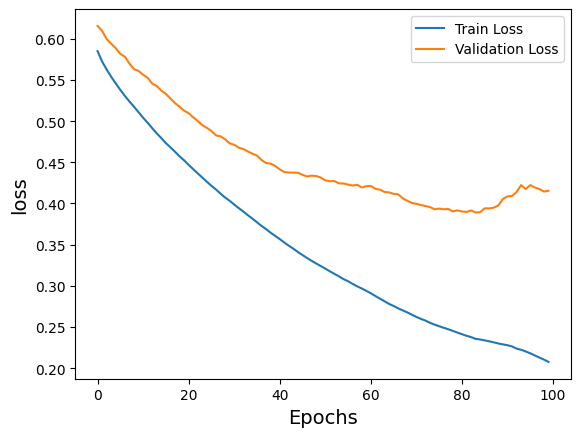

In [47]:
#For MODEL with Base NN with Adam optimizer.
# Capturing learning history per epoch
hist  = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results
results = keras_model.evaluate(X_test, y_test)

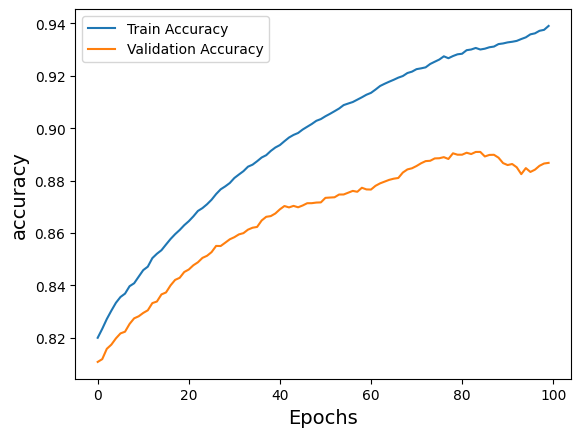

In [48]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)

- NN Model with Adam optimizer and Batch normalization.

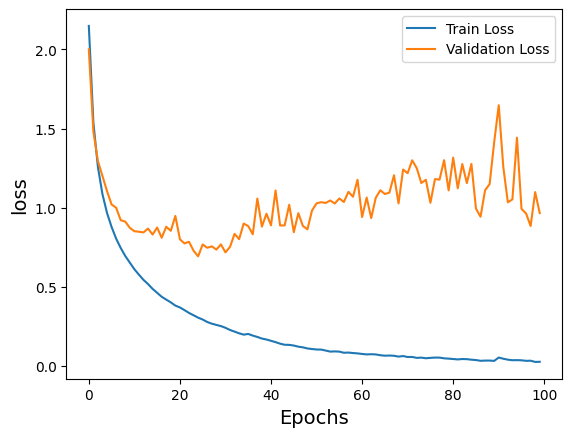

In [49]:
#For MODEL with Base NN with Adam optimizer and batch normalization.
# Capturing learning history per epoch
hist  = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results

In [50]:
#Printing results
results = keras_model_1.evaluate(X_test, y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7443 - loss: 1.6190


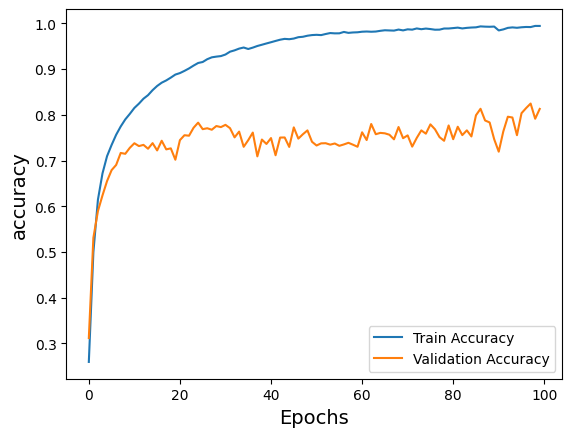

In [51]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)

- NN Model with SGD optimizer.

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4445 - loss: 1.6777


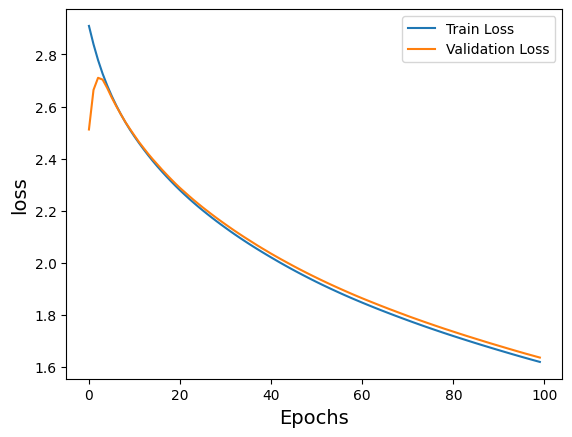

In [52]:
#For MODEL with SGD optimizer.
# Capturing learning history per epoch
hist  = pd.DataFrame(history_3.history)
hist['epoch'] = history_3.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results
results = keras_model_2.evaluate(X_test, y_test)

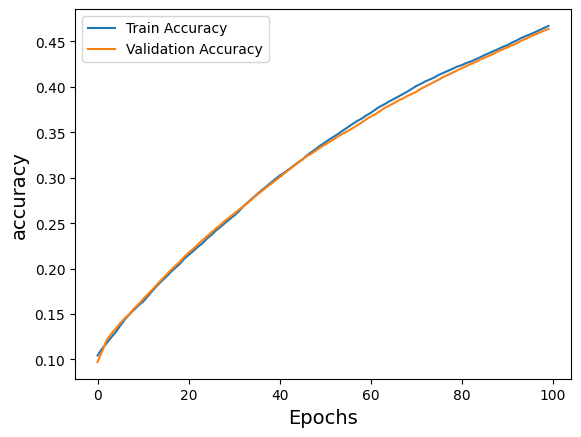

In [53]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)

- NN MODEL with Adam optimizrer, Batch normalization, Dropout tuning parameters.

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.5406


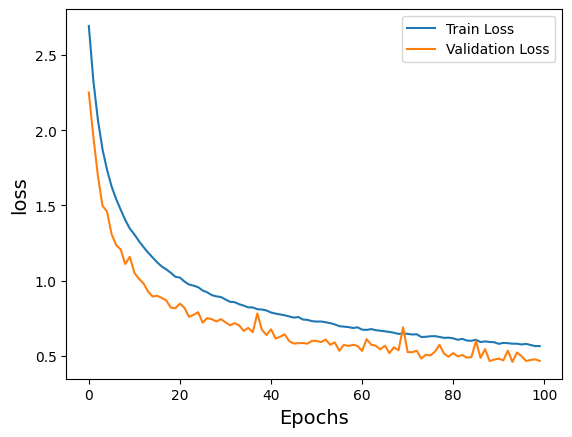

In [54]:
#For MODEL with Adam optimizer, Batch normalization, Drop out.
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_3.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results
results = keras_model_3.evaluate(X_test, y_test)

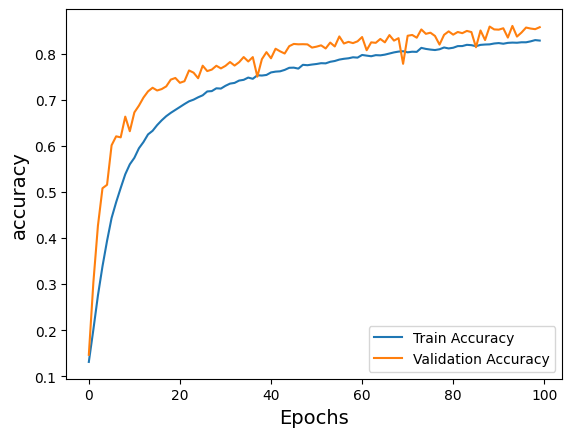

In [55]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)

#### OBSERVATIONS/INFERENCES:
- Neaural Network(NN) with Adam optimizer model, we see Loss is high for validation than train set and loss didnt converge either. With Train accuracy at 94% and Test at 82%, model is overfit and is not suitable.
- With NN with Adam optimizer and Batch Normalization model, Train loss converged but Validation loss didnt converge and noise is observed. With Train Accuracy at 100% and Test accuracy at 74%, model is highly overfitting. So this model is rejected.
- NN with SGD Optimizer model model, Train and Val loss converged perfectly and aligned. Train, Validation and Test Accuracies are correctly but but unfortunately this model gives very low accuracy at 46% which is quite less compared to others and is below the expectations.
- NN model with Adam optimizer, Batch normalization and Drop out(20%), we see Train and Validation loss converging and curve aligning. Validation loss curve has slight noise due to drop out feature but will not be present in Test data.  Models Train, Validation and Test Accuracies are also perfectly fit(83%, 86%, 83%).

#### So the best model for this particular SVNH Dataset seems to be Neural Network with Adam optimizer, Learning Rate 0.0001, Batch Normalization and Drop out (0.2) hyper parameters.

#### *************** END OF PROJECT PART B *******